# Score higher, longer, more python-y

## Step 1: Load the data and perform basic operations.

In [3]:
import pandas as pd

##### 1. Load the data in using pandas.

In [4]:
%pwd

'C:\\Users\\conor\\OneDrive\\Desktop\\ReposGoHere\\GARepos\\Global\\Homework\\Project1-SAT\\code'

In [5]:
data_sat = pd.read_csv("./../data/sat.csv")
data_act = pd.read_csv("./../data/act.csv")

##### 2. Print the first ten rows of each dataframe.

In [6]:
data_act.head(10)

,Unnamed: 0,State,Participation,English,Math,Reading,Science,Composite
0,0,National,60%,20.3,20.7,21.4,21.0,21.0
1,1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,5,California,31%,22.5,22.7,23.1,22.2,22.8
6,6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


1. Unamed - legacy index
2. State - state index for each row
3. Percent of population participating in test
4. English score
5. Math score
6. Reading score
7. Science score
8. Normalized total score

In [7]:
data_sat.head(10)

,Unnamed: 0,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,0,Alabama,5%,593,572,1165
1,1,Alaska,38%,547,533,1080
2,2,Arizona,30%,563,553,1116
3,3,Arkansas,3%,614,594,1208
4,4,California,53%,531,524,1055
5,5,Colorado,11%,606,595,1201
6,6,Connecticut,100%,530,512,1041
7,7,Delaware,100%,503,492,996
8,8,District of Columbia,100%,482,468,950
9,9,Florida,83%,520,497,1017


##### 3. Describe in words what each variable (column) is.

1. Unamed - legacy index
2. State - state index for each row
3. Percent of population participating in test
4. English score
5. Math score
6. Composite Total

##### 4. Does the data look complete? Are there any obvious issues with the observations?

At first glance it appears complete, however 100% completion seems bad

##### 5. Print the types of each column.

In [8]:
data_act.dtypes

Unnamed: 0         int64
State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

In [9]:
data_sat.dtypes

Unnamed: 0                             int64
State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [10]:
#Note: ACT has Washington DC data, but SAT does not

##### 6. Do any types need to be reassigned? If so, go ahead and do it.

In [11]:
#yes - both data frames have percentages stored as strings

data_act['Participation'] = data_act['Participation'].apply(lambda x: float(x.replace('%', ''))/100)

In [12]:
data_sat['Participation'] = data_sat['Participation'].apply(lambda x: float(x.replace('%', ''))/100)

##### 7. Create a dictionary for each column mapping the State to its respective value for that column. (For example, you should have three SAT dictionaries.)

In [13]:
dict_act_participation = dict(zip(data_act['State'], data_act['Participation']))
dict_act_math = dict(zip(data_act['State'], data_act['Math']))
dict_act_reading = dict(zip(data_act['State'], data_act['Reading']))
dict_act_science = dict(zip(data_act['State'], data_act['Science']))
dict_act_composite = dict(zip(data_act['State'], data_act['Composite']))

In [14]:
dict_sat_participation = dict(zip(data_sat['State'], data_sat['Participation']))
dict_sat_math = dict(zip(data_sat['State'], data_sat['Math']))
dict_sat_reading = dict(zip(data_sat['State'], data_sat['Evidence-Based Reading and Writing']))
dict_sat_total = dict(zip(data_sat['State'], data_sat['Total']))


##### 8. Create one dictionary where each key is the column name, and each value is an iterable (a list or a Pandas Series) of all the values in that column.

In [15]:
new_dict = {
    'State' :data_act['State'],
    'Math':data_act['Math'],
    'Reading':data_act['Reading'],
    'Science':data_act['Science'],
    'Composite':data_act['Composite']
    
}

In [16]:
new_dict['Math']

0     20.7
1     18.4
2     19.8
3     19.8
4     19.0
5     22.7
6     20.3
7     24.6
8     23.4
9     23.5
10    19.4
11    20.9
12    19.2
13    21.8
14    21.2
15    22.4
16    21.3
17    21.3
18    19.4
19    18.8
20    24.0
21    23.1
22    25.3
23    23.7
24    21.5
25    18.1
26    19.9
27    20.2
28    20.9
29    18.0
30    25.1
31    23.8
32    19.4
33    24.0
34    19.3
35    20.4
36    21.6
37    18.8
38    21.5
39    23.4
40    23.3
41    18.6
42    21.5
43    19.2
44    20.7
45    19.9
46    23.1
47    23.3
48    21.9
49    19.4
50    20.4
51    19.8
Name: Math, dtype: float64

##### 9. Merge the dataframes on the state column.

In [17]:
#changing names before merge

In [18]:
data_act.drop('Unnamed: 0', axis=1, inplace=True)
data_sat.drop('Unnamed: 0', axis=1, inplace=True)

In [19]:
df_merged = data_act.merge(data_sat, on='State', suffixes=('_act', '_sat'))

##### 10. Change the names of the columns so you can distinguish between the SAT columns and the ACT columns.

In [20]:
#done with mergr -> suxxifex

##### 11. Print the minimum and maximum of each numeric column in the data frame.

In [21]:
df_merged.Math_sat.std()

84.90911865855486

In [22]:
for c in df_merged.columns:
    if df_merged[str(c)].dtype == 'float64' or  df_merged[str(c)].dtype == 'int64':
        print(c, 'Max: {}, Min: {}'.format(df_merged[str(c)].max(), df_merged[str(c)].min()))

Participation_act Max: 1.0, Min: 0.08
English Max: 25.5, Min: 16.3
Math_act Max: 25.3, Min: 18.0
Reading Max: 26.0, Min: 18.1
Science Max: 24.9, Min: 2.3
Composite Max: 25.5, Min: 17.8
Participation_sat Max: 1.0, Min: 0.02
Evidence-Based Reading and Writing Max: 644, Min: 482
Math_sat Max: 651, Min: 52
Total Max: 1295, Min: 950


##### 12. Write a function using only list comprehensions, no loops, to compute standard deviation. Using this function, calculate the standard deviation of each numeric column in both data sets. Add these to a list called `sd`.

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

In [23]:

def whywouldyoueverdothis(shouldntneedaninput):
    aseries_forsomereason = shouldntneedaninput
    n_the_way_it_should_be_done = aseries_forsomereason.size
    mean_the_way_it_should_be_done = aseries_forsomereason.mean()
    sd_val = ((sum([((pointlessly_granular - mean_the_way_it_should_be_done)**2) for pointlessly_granular in aseries_forsomereason]))/(n_the_way_it_should_be_done-1))**.5
    
    return sd_val

sd={element: (whywouldyoueverdothis(df_merged[element])) for element in list(df_merged.columns) if df_merged[element].dtype == 'float64' or df_merged[element].dtype == 'int64'}


In [24]:
sd

{'Participation_act': 0.32140842015886834,
 'English': 2.35367713980303,
 'Math_act': 1.9819894936505533,
 'Reading': 2.0672706264873146,
 'Science': 3.182462975155452,
 'Composite': 2.020694891154341,
 'Participation_sat': 0.35276632270013036,
 'Evidence-Based Reading and Writing': 45.66690138768932,
 'Math_sat': 84.90911865855486,
 'Total': 92.49481172519046}

## Step 2: Manipulate the dataframe

##### 13. Turn the list `sd` into a new observation in your dataset.

In [25]:
df_merged.append(pd.Series(data=sd), ignore_index=True)

,State,Participation_act,English,Math_act,Reading,Science,Composite,Participation_sat,Evidence-Based Reading and Writing,Math_sat,Total
0,Alabama,1.000000,18.900000,18.400000,19.700000,19.400000,19.200000,0.050000,593.000000,572.000000,1165.000000
1,Alaska,0.650000,18.700000,19.800000,20.400000,19.900000,19.800000,0.380000,547.000000,533.000000,1080.000000
2,Arizona,0.620000,18.600000,19.800000,20.100000,19.800000,19.700000,0.300000,563.000000,553.000000,1116.000000
3,Arkansas,1.000000,18.900000,19.000000,19.700000,19.500000,19.400000,0.030000,614.000000,594.000000,1208.000000
4,California,0.310000,22.500000,22.700000,23.100000,22.200000,22.800000,0.530000,531.000000,524.000000,1055.000000
5,Colorado,1.000000,20.100000,20.300000,21.200000,20.900000,20.800000,0.110000,606.000000,595.000000,1201.000000
6,Connecticut,0.310000,25.500000,24.600000,25.600000,24.600000,25.200000,1.000000,530.000000,512.000000,1041.000000
7,Delaware,0.180000,24.100000,23.400000,24.800000,23.600000,24.100000,1.000000,503.000000,492.000000,996.000000
8,District of Columbia,0.320000,24.400000,23.500000,24.900000,23.500000,24.200000,1.000000,482.000000,468.000000,950.000000
9,Florida,0.730000,19.000000,19.400000,21.000000,19.400000,19.800000,0.830000,520.000000,497.000000,1017.000000


##### 14. Sort the dataframe by the values in a numeric column (e.g. observations descending by SAT participation rate)

In [26]:
df_merged['Math_act'].sort_values()

28    18.0
24    18.1
0     18.4
40    18.6
36    18.8
18    18.8
3     19.0
42    19.2
11    19.2
33    19.3
48    19.4
31    19.4
9     19.4
17    19.4
50    19.8
1     19.8
2     19.8
25    19.9
44    19.9
26    20.2
5     20.3
34    20.4
49    20.4
43    20.7
27    20.9
10    20.9
13    21.2
15    21.3
16    21.3
37    21.5
23    21.5
41    21.5
35    21.6
12    21.8
47    21.9
14    22.4
4     22.7
45    23.1
20    23.1
39    23.3
46    23.3
7     23.4
38    23.4
8     23.5
22    23.7
30    23.8
19    24.0
32    24.0
6     24.6
29    25.1
21    25.3
Name: Math_act, dtype: float64

##### 15. Use a boolean filter to display only observations with a score above a certain threshold (e.g. only states with a participation rate above 50%)

In [27]:
df_merged[df_merged['Math_act']>24]

,State,Participation_act,English,Math_act,Reading,Science,Composite,Participation_sat,Evidence-Based Reading and Writing,Math_sat,Total
6,Connecticut,0.31,25.5,24.6,25.6,24.6,25.2,1.00,530,512,1041
21,Massachusetts,0.29,25.4,25.3,25.9,24.7,25.4,0.76,555,551,1107
29,New Hampshire,0.18,25.4,25.1,26.0,24.9,25.5,0.96,532,520,1052


## Step 3: Visualize the data

##### 16. Using MatPlotLib and PyPlot, plot the distribution of the Rate columns for both SAT and ACT using histograms. (You should have two histograms. You might find [this link](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes) helpful in organizing one plot above the other.) 

In [28]:
import matplotlib.pyplot as plt

In [29]:
import seaborn as sns

In [30]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

##### 17. Plot the Math(s) distributions from both data sets.

In [31]:
#So this returns a usable dataframe of only the numeric columns, which the question is not asking for
#I'm leaving it in here because it seems useful to me for later on
numcols = [col for col in df_merged.columns if df_merged[str(col)].dtype == 'float64' or df_merged[str(col)].dtype == 'int64']
df_merged[numcols].head()

,Participation_act,English,Math_act,Reading,Science,Composite,Participation_sat,Evidence-Based Reading and Writing,Math_sat,Total
0,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593,572,1165
1,0.65,18.7,19.8,20.4,19.9,19.8,0.38,547,533,1080
2,0.62,18.6,19.8,20.1,19.8,19.7,0.30,563,553,1116
3,1.00,18.9,19.0,19.7,19.5,19.4,0.03,614,594,1208
4,0.31,22.5,22.7,23.1,22.2,22.8,0.53,531,524,1055


In [32]:
math_scores = ['Math_act', 'Science', 'Math_sat']
verb_scores = ['English', 'Reading', 'Evidence-Based Reading and Writing']

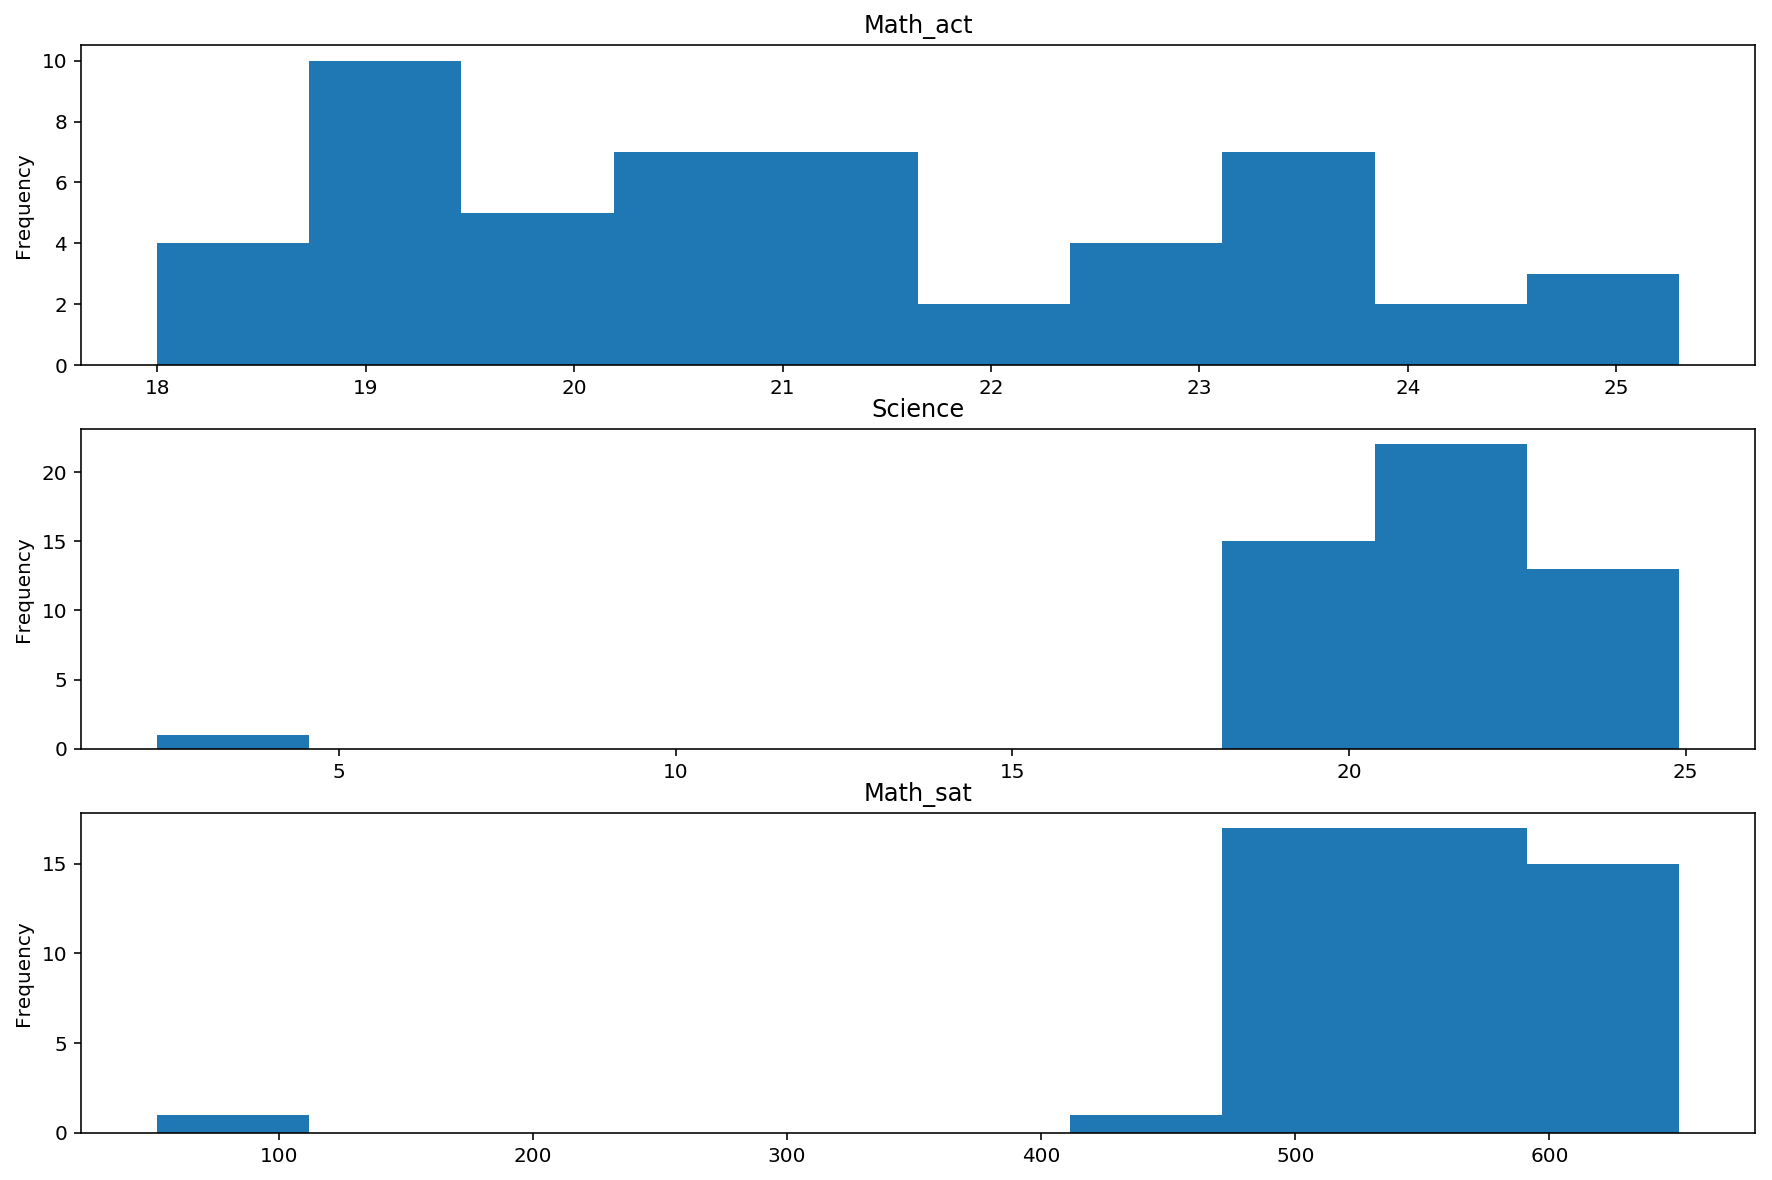

In [33]:
fig, ax = plt.subplots(nrows=len(math_scores), figsize=(15,10))
for i in range(len(math_scores)):
    df_merged[math_scores].iloc[:,i].plot(ax=ax[i], kind = 'hist', title=math_scores[i])

##### 18. Plot the Verbal distributions from both data sets.

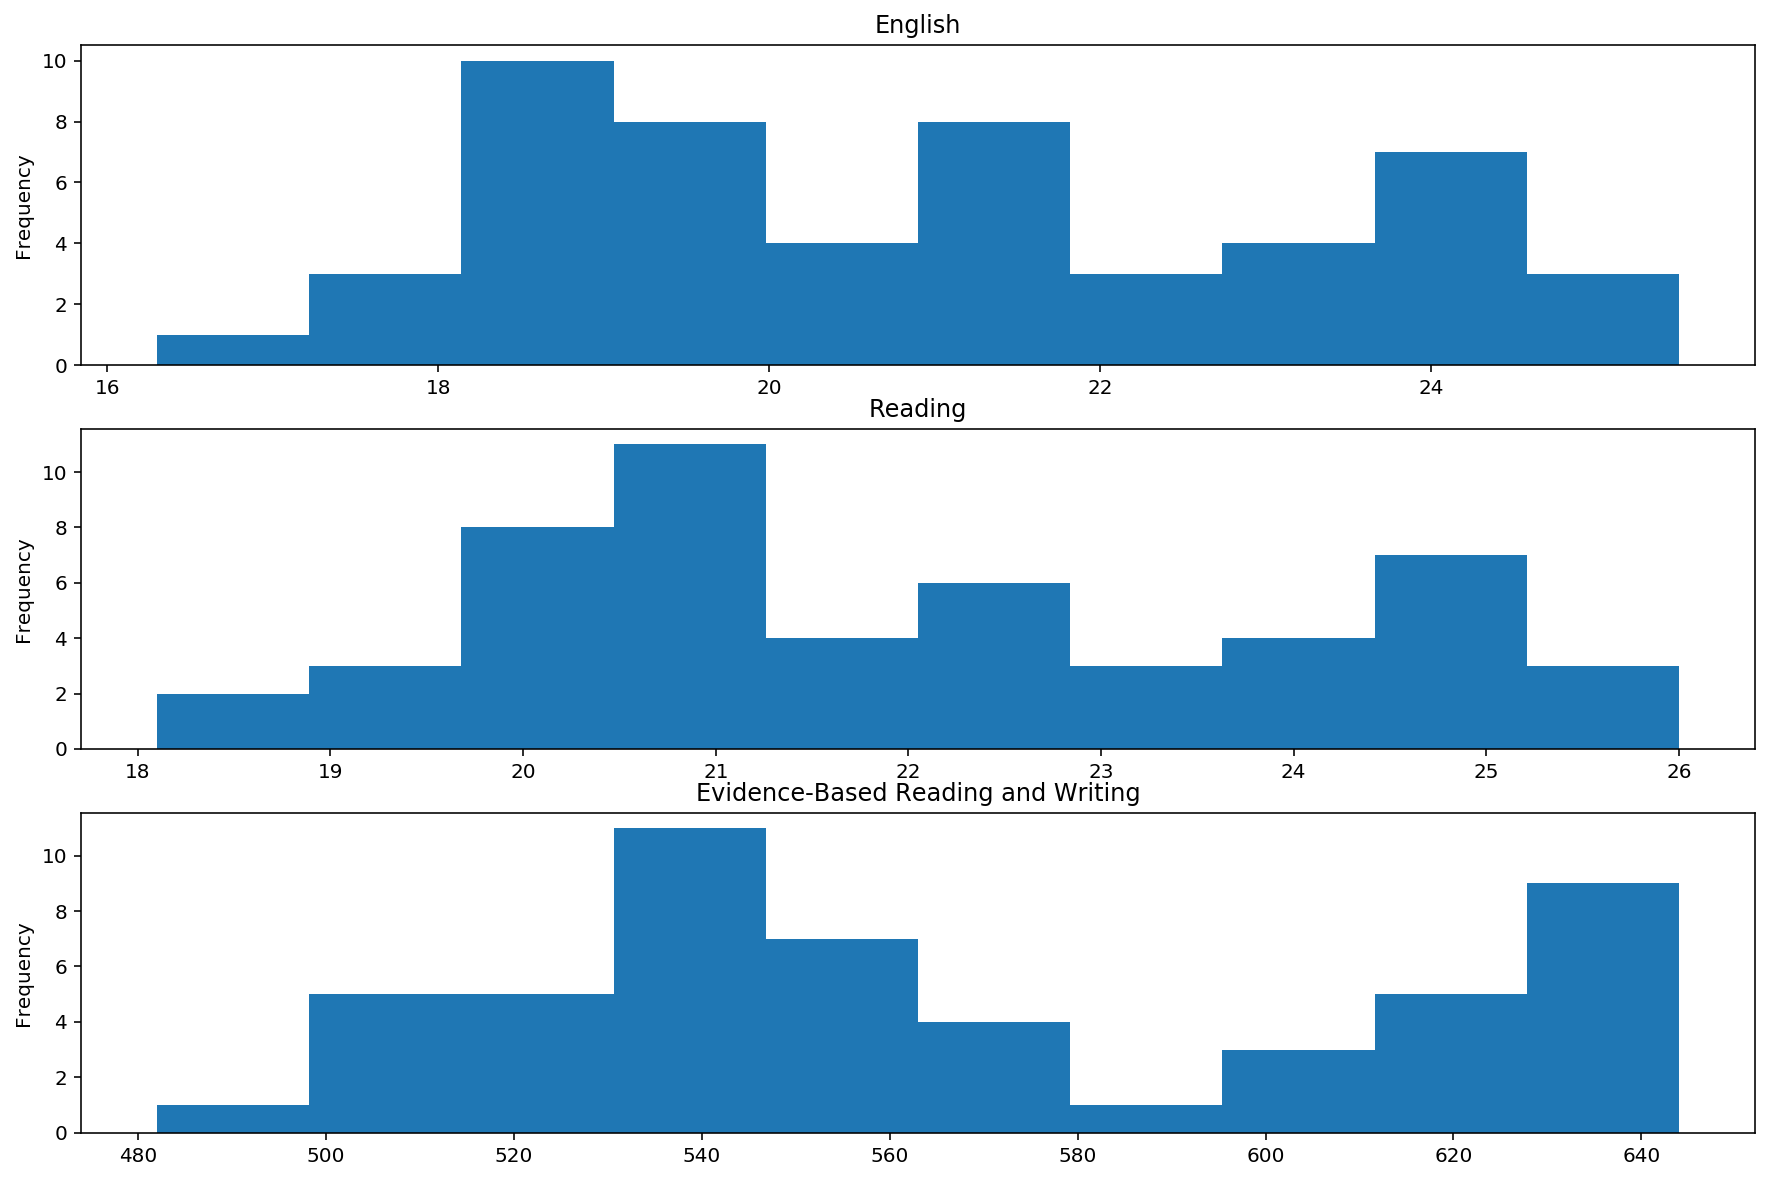

In [34]:
fig, ax = plt.subplots(nrows=len(verb_scores), figsize=(15,10))
for i in range(len(verb_scores)):
    df_merged[verb_scores].iloc[:,i].plot(ax=ax[i], kind = 'hist', title=verb_scores[i])

##### 19. When we make assumptions about how data are distributed, what is the most common assumption?

Generall, that it is normal, or that it represents a single distribution

##### 20. Does this assumption hold true for any of our columns? Which?

In [35]:
import scipy as sp

In [36]:
for i in numcols:
    print(i, sp.stats.mstats.normaltest(df_merged[i]))

Participation_act NormaltestResult(statistic=72.50510406893649, pvalue=1.8018419611696658e-16)
English NormaltestResult(statistic=4.945616782086351, pvalue=0.08434764489205682)
Math_act NormaltestResult(statistic=6.547294554392776, pvalue=0.03786805958606832)
Reading NormaltestResult(statistic=6.248639549660324, pvalue=0.04396683079879635)
Science NormaltestResult(statistic=77.5558656361745, pvalue=1.441975088149312e-17)
Composite NormaltestResult(statistic=6.557389886662569, pvalue=0.03767739587231253)
Participation_sat NormaltestResult(statistic=24.84401282693096, pvalue=4.02894334576706e-06)
Evidence-Based Reading and Writing NormaltestResult(statistic=13.81815328788405, pvalue=0.0009986795076584)
Math_sat NormaltestResult(statistic=75.69485703674906, pvalue=3.656542623320732e-17)
Total NormaltestResult(statistic=9.607185954097002, pvalue=0.008200230814088539)


Significant distributions: ACT English, ACT Math, ACT reading, ACT Composite, SAT Total

##### 21. Plot some scatterplots examining relationships between all variables.

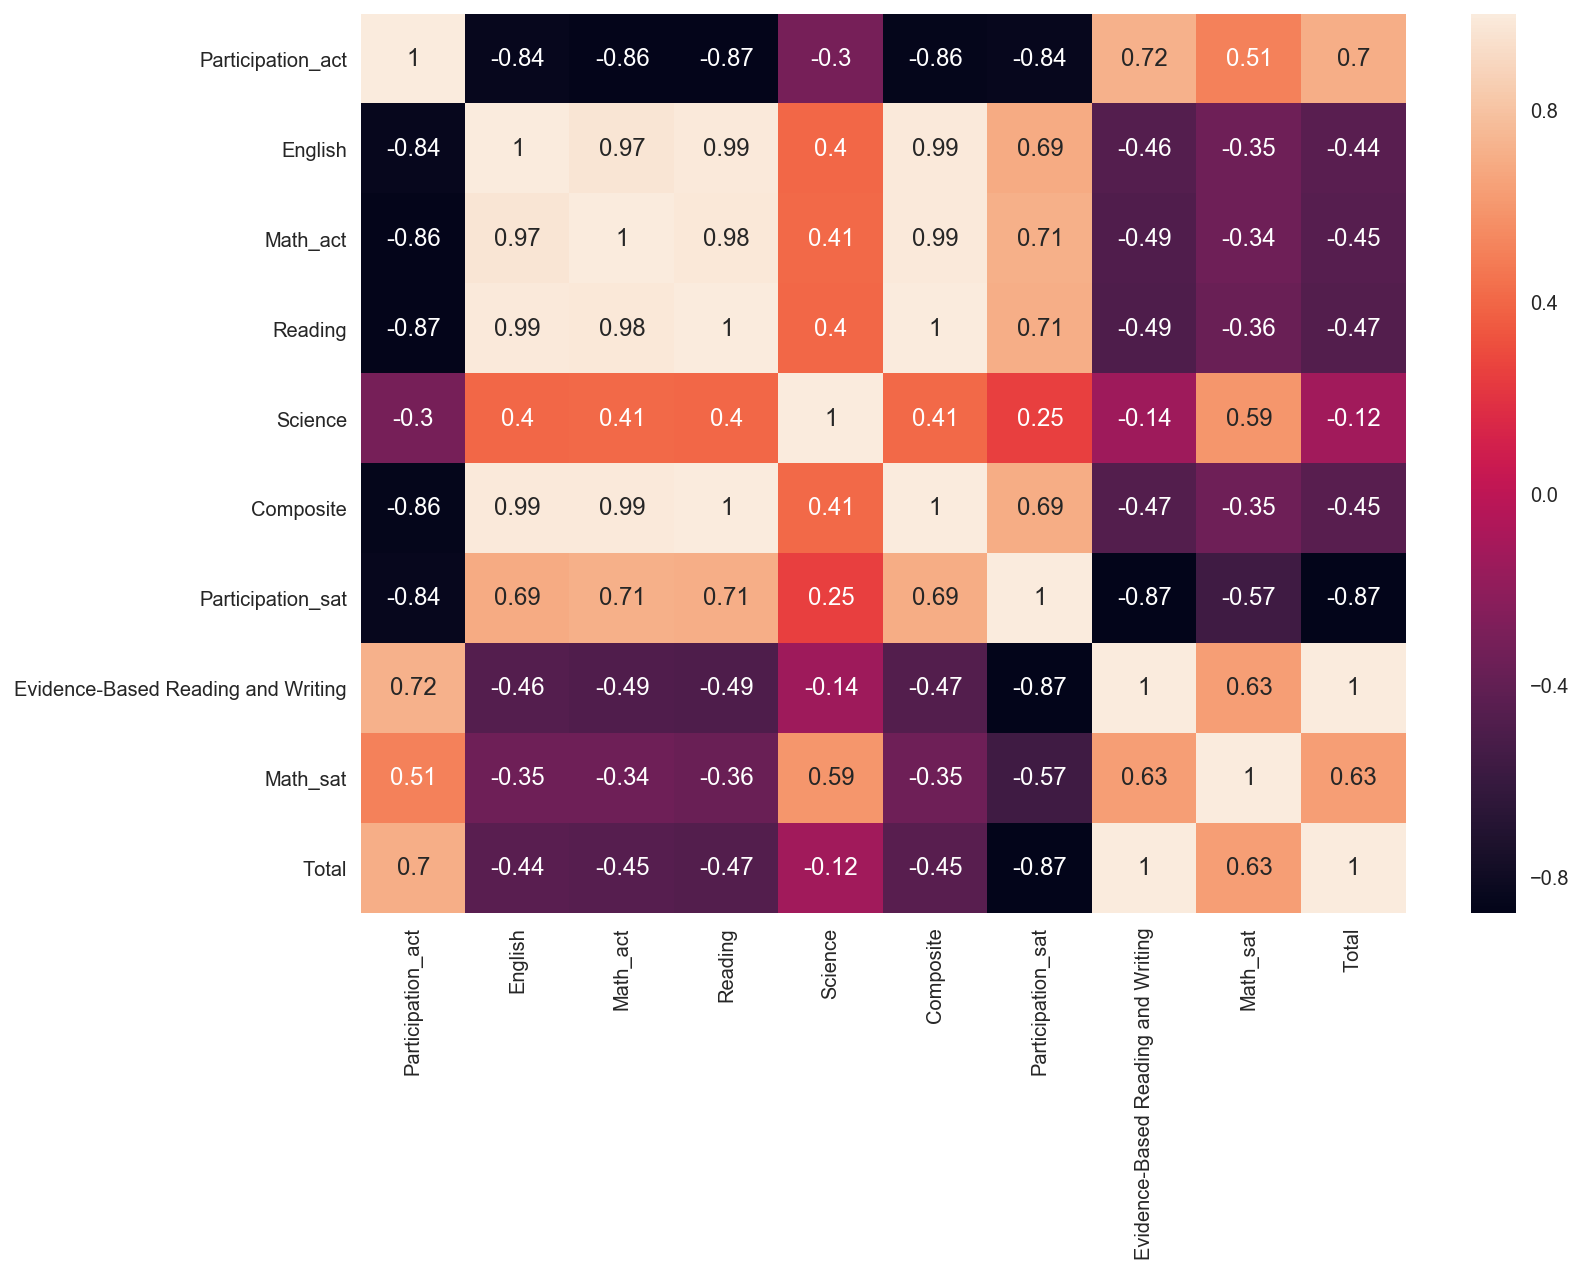

In [65]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
mploy2 = sns.heatmap(df_merged[numcols].corr(), annot=True)
fig = mploy2.get_figure()
fig.savefig(r"C:\Users\conor\OneDrive\Documents\General Assembly\Course\Projects\heatmap.jpeg")

AttributeError: 'AxesSubplot' object has no attribute 'savefig'

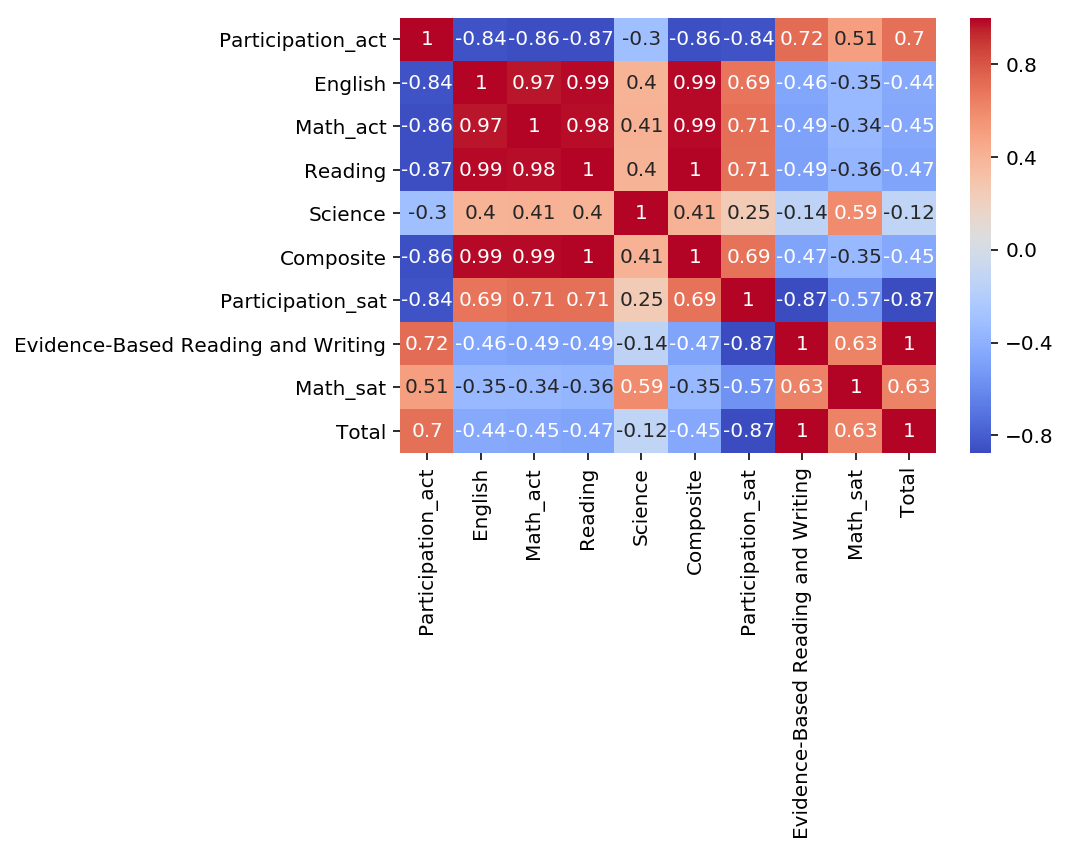

In [57]:
#plt.figure(figsize=(20,20))
mploy = sns.heatmap(df_merged[numcols].corr(), annot=True, cmap='coolwarm')
mploy.savefig(r"C:\Users\conor\OneDrive\Documents\General Assembly\Course\Projects\heatmap.jpeg")

##### 22. Are there any interesting relationships to note?

Participation rates seem to be strongly negatively correlated to totals of the test, but pos. correl. for the opposite test.
ACT sub-scores are tightly grouped with eachother,  as are SAT scores

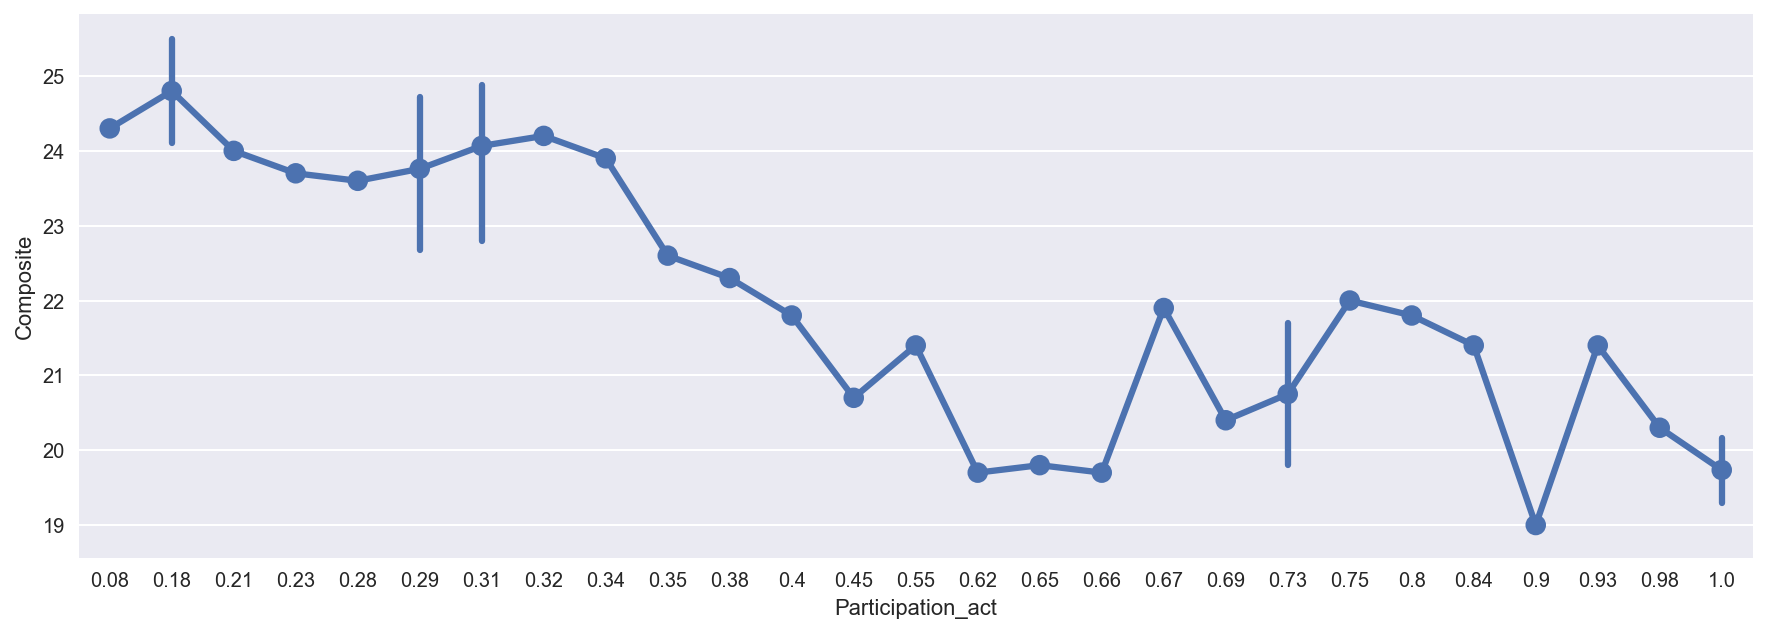

In [69]:
plt.figure(figsize=(15,5))
sns.pointplot(x=df_merged['Participation_act'], y=df_merged['Composite'])

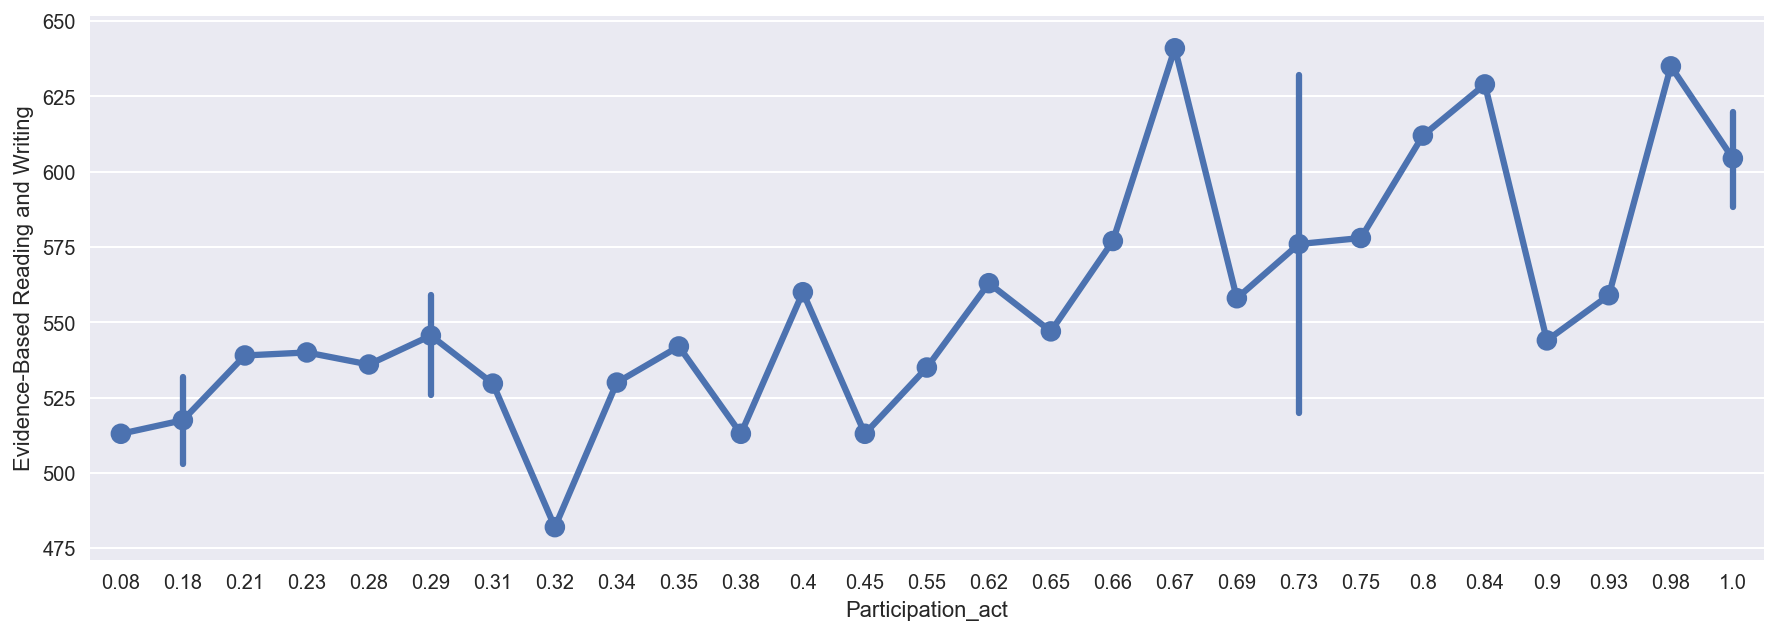

In [68]:
plt.figure(figsize=(15,5))
sns.pointplot(x=df_merged['Participation_act'], y=df_merged['Evidence-Based Reading and Writing'])

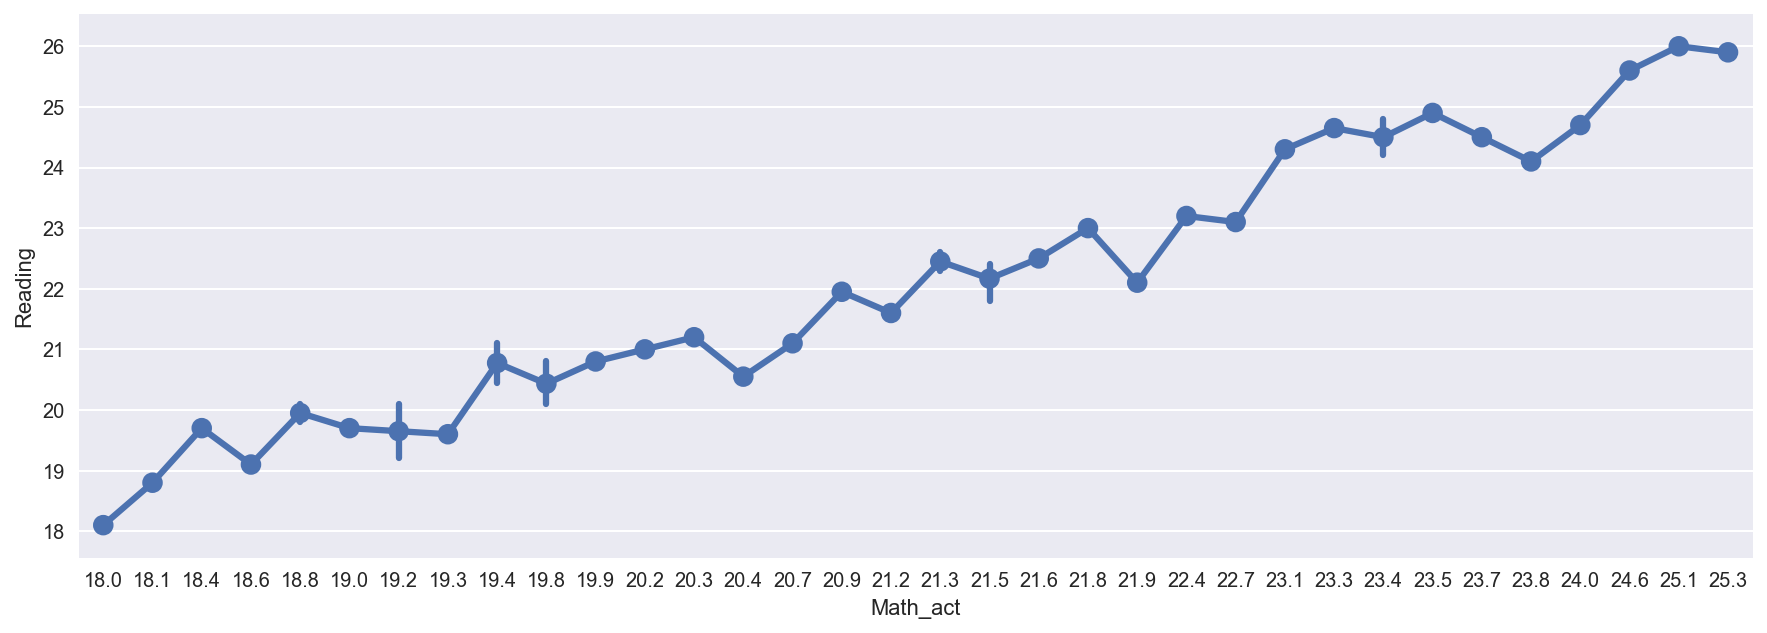

In [67]:
plt.figure(figsize=(15,5))
sns.pointplot(x=df_merged['Math_act'], y=df_merged['Reading'])


##### 23. Create box plots for each variable. 

In [41]:
df_merged[numcols].columns

Index(['Participation_act', 'English', 'Math_act', 'Reading', 'Science',
       'Composite', 'Participation_sat', 'Evidence-Based Reading and Writing',
       'Math_sat', 'Total'],
      dtype='object')

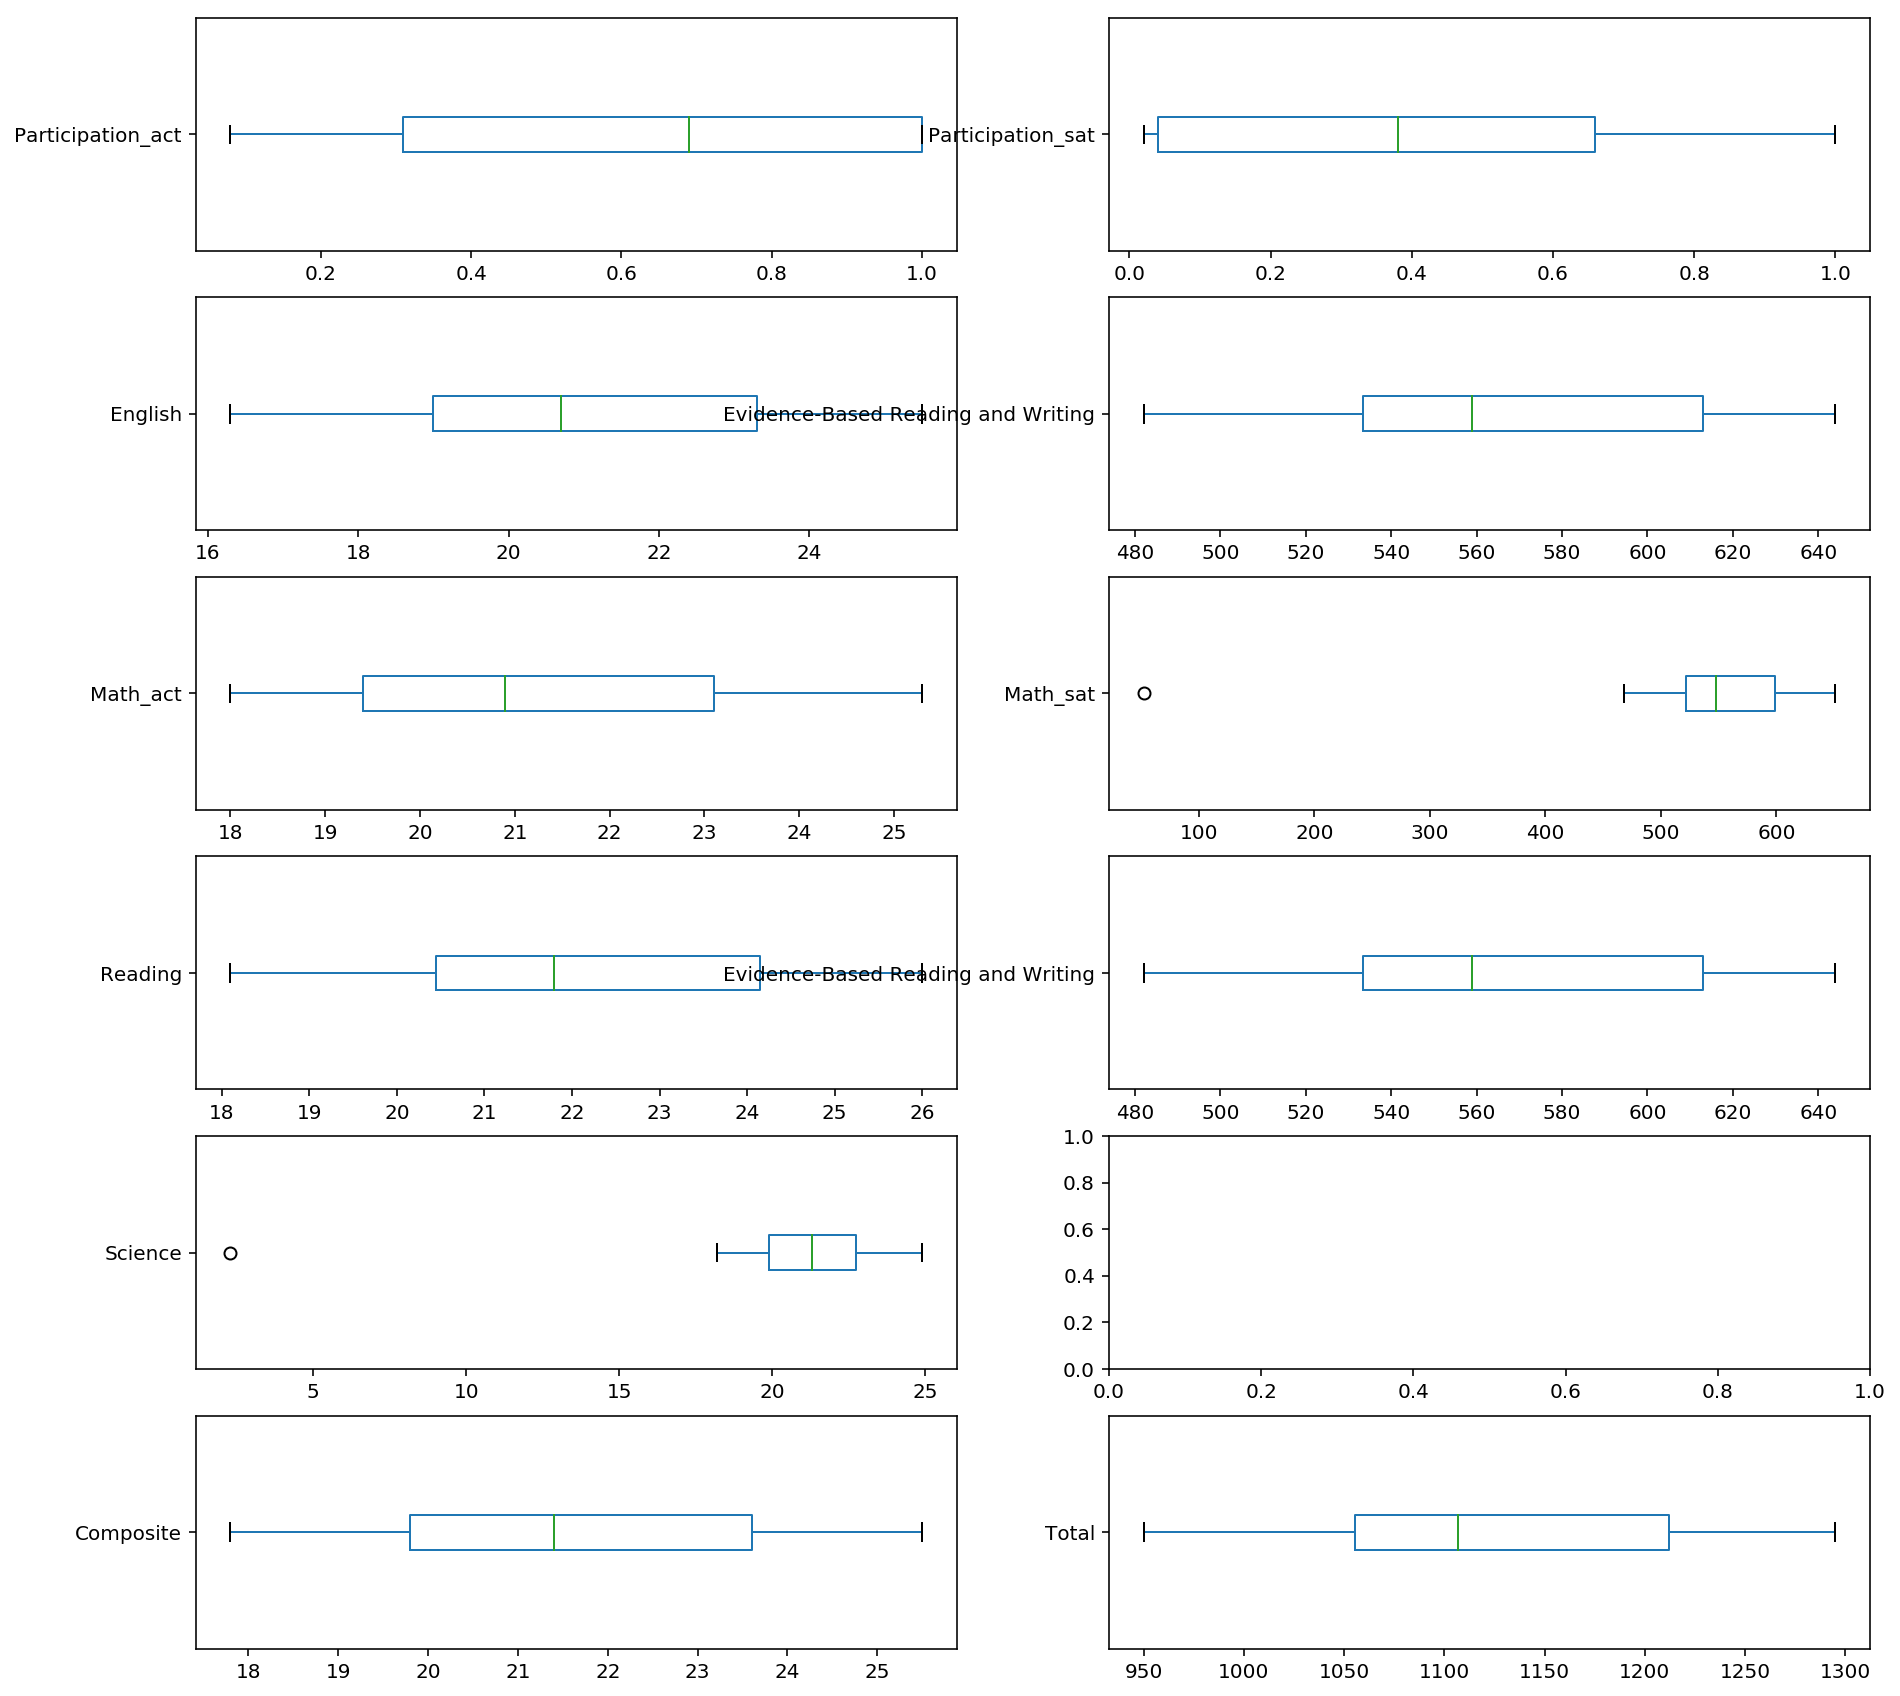

In [42]:
fig, ax = plt.subplots(nrows=6, ncols=2, figsize=(15,15))
df_merged['Participation_act'].plot(kind='box', ax=ax[0,0], vert=False)
df_merged['English'].plot(kind='box', ax=ax[1,0], vert=False)
df_merged['Math_act'].plot(kind='box', ax=ax[2,0], vert=False)
df_merged['Reading'].plot(kind='box', ax=ax[3,0], vert=False)
df_merged['Science'].plot(kind='box', ax=ax[4,0], vert=False)
df_merged['Composite'].plot(kind='box', ax=ax[5,0], vert=False)

df_merged['Participation_sat'].plot(kind='box', ax=ax[0,1], vert=False)
df_merged['Evidence-Based Reading and Writing'].plot(kind='box', ax=ax[1,1], vert=False)
df_merged['Math_sat'].plot(kind='box', ax=ax[2,1], vert=False)
df_merged['Evidence-Based Reading and Writing'].plot(kind='box', ax=ax[3,1], vert=False)
df_merged['Total'].plot(kind='box', ax=ax[5,1], vert=False)


##### BONUS: Using Tableau, create a heat map for each variable using a map of the US. 

In [43]:
#https://public.tableau.com/profile/conor.barry.hoke#!/vizhome/StandardizedTesting_0/Sheet2

## Step 4: Descriptive and Inferential Statistics

In [44]:
import numpy as np
import scipy as sp

##### 24. Summarize each distribution. As data scientists, be sure to back up these summaries with statistics. (Hint: What are the three things we care about when describing distributions?)

In [45]:
for c in numcols:
    print('{}:\n mean: {}\n median: {}\n C mode:{}\n'.format(
        c, 
        round(df_merged[str(c)].mean(), 3), 
        round(df_merged[str(c)].median(), 3),
        round(df_merged[str(c)].mode(), 3)
    ))


Participation_act:
 mean: 0.653
 median: 0.69
 C mode:0    1.0
dtype: float64

English:
 mean: 20.931
 median: 20.7
 C mode:0    19.0
1    19.5
2    21.2
dtype: float64

Math_act:
 mean: 21.182
 median: 20.9
 C mode:0    19.4
dtype: float64

Reading:
 mean: 22.014
 median: 21.8
 C mode:0    20.1
1    20.8
dtype: float64

Science:
 mean: 21.041
 median: 21.3
 C mode:0    20.5
1    20.6
2    20.9
3    22.0
dtype: float64

Composite:
 mean: 21.52
 median: 21.4
 C mode:0    19.8
1    20.3
2    21.4
dtype: float64

Participation_sat:
 mean: 0.398
 median: 0.38
 C mode:0    0.03
dtype: float64

Evidence-Based Reading and Writing:
 mean: 569.118
 median: 559.0
 C mode:0    513
1    530
dtype: int64

Math_sat:
 mean: 547.627
 median: 548.0
 C mode:0    524
1    541
2    551
3    553
4    604
dtype: int64

Total:
 mean: 1126.098
 median: 1107.0
 C mode:0    1005
1    1052
2    1116
dtype: int64



##### 25. Summarize each relationship. Be sure to back up these summaries with statistics.

In [46]:
#Refer to correl matrix above

##### 26. Execute a hypothesis test comparing the SAT and ACT participation rates. Use $\alpha = 0.05$. Be sure to interpret your results.

### Hypothesis:
Participation rate in ACT is higher overall than SAT

1. Null: Participation Rates are the same
2. Alternative: Participation rates are different



In [47]:
tstat, pval = sp.stats.ttest_ind(df_merged['Participation_act'], df_merged.Participation_sat)

print(round(tstat,2), round(pval, 4))

3.81 0.0002


pval < .001, so we can reject the null hypothesis that the average participation rate for the two tests is the same.  

Below is a sample for what the two participation rate distributions would look like if they were normal. 

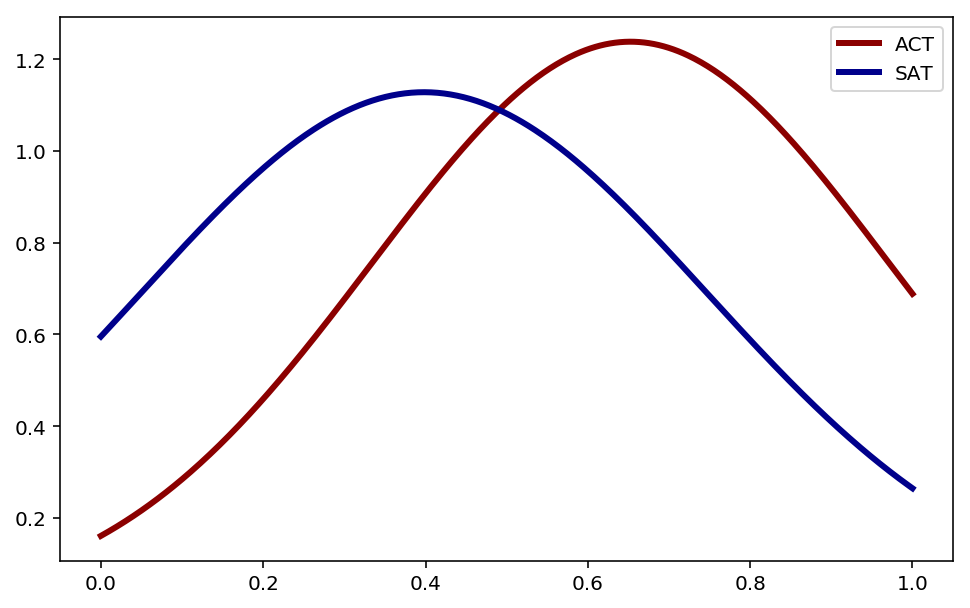

In [48]:
xpoints = np.linspace(0, 1, 500)
ypoints = sp.stats.t.pdf(xpoints, 
                      len(df_merged['Participation_act']) + len(df_merged.Participation_sat) - 2,
                      df_merged['Participation_act'].mean(), df_merged['Participation_act'].std())
ypoints2 = sp.stats.t.pdf(xpoints, 
                      len(df_merged['Participation_act']) + len(df_merged.Participation_sat) - 2,
                      df_merged['Participation_sat'].mean(), df_merged['Participation_sat'].std())

# Initialize a `matplotlib` "figure."
fig, ax = plt.subplots(figsize=(8,5)) 

ax.plot(xpoints, ypoints, linewidth=3, color='darkred')
ax.plot(xpoints, ypoints2, linewidth=3, color='darkblue')
ax.legend(['ACT', 'SAT'])

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


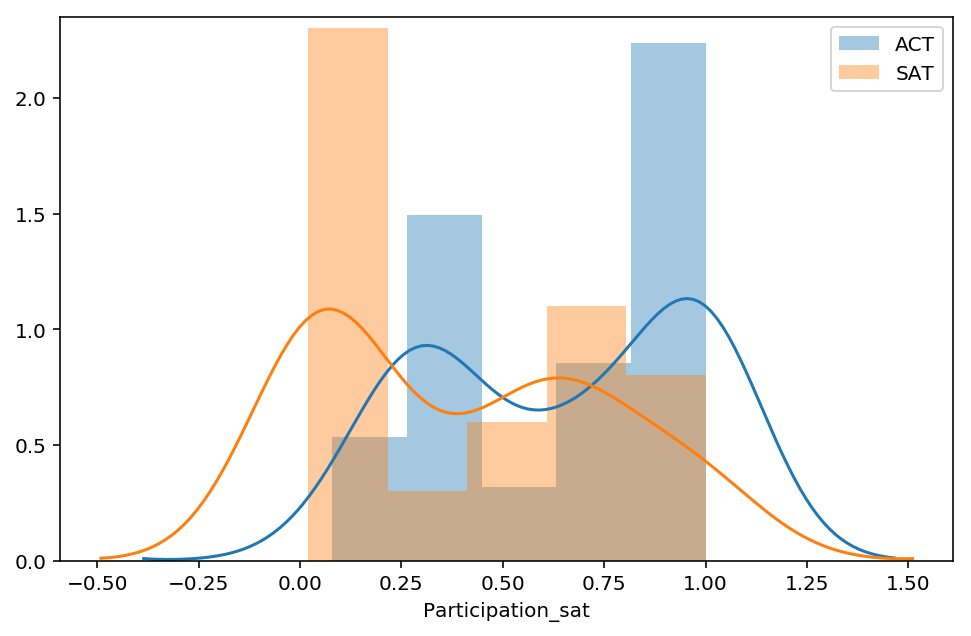

In [49]:
xpoints = np.linspace(0, 1, 51)
ypoints = (df_merged.Participation_act)
ypoints2 = (df_merged.Participation_sat)

# Initialize a `matplotlib` "figure."
fig, ax = plt.subplots(figsize=(8,5)) 


sns.distplot(df_merged.Participation_act, bins=5)
sns.distplot(df_merged.Participation_sat, bins=5)
ax.legend(['ACT', 'SAT'])

##### 27. Generate and interpret 95% confidence intervals for SAT and ACT participation rates.

In [50]:
print(sp.stats.norm.interval(0.95, df_merged['Participation_act'].mean(), df_merged['Participation_act'].std()))

print(sp.stats.norm.interval(0.95, df_merged['Participation_sat'].mean(), df_merged['Participation_sat'].std()))

(0.022600091768543606, 1.2824979474471425)
(-0.2933700717646155, 1.0894485031371646)


The interval results above assume a normal distribution, however the underlying values for this move outside the bounds. So, I will use the more literal method of counting up the 5th and 95th entries:

In [51]:
#df.a.nlargest(3).iloc[-1]
act_95 = int(df_merged.Participation_act.count()*.95)
act_05 = int(df_merged.Participation_act.count()*.05)
sat_95 = int(df_merged.Participation_sat.count()*.95)
sat_05 = int(df_merged.Participation_sat.count()*.05)

print('ACT 95th:', df_merged.Participation_act.sort_values().iloc[act_95])
print('ACT 5th:', df_merged.Participation_act.sort_values().iloc[act_05])
print('SAT 95th:', df_merged.Participation_act.sort_values().iloc[sat_95])
print('SAT 5th:', df_merged.Participation_act.sort_values().iloc[sat_05])

ACT 95th: 1.0
ACT 5th: 0.18
SAT 95th: 1.0
SAT 5th: 0.18


In [76]:
df_merged.Participation_sat.sort_values()

df_merged[df_merged['Participation_sat']<.04]

,State,Participation_act,English,Math_act,Reading,Science,Composite,Participation_sat,Evidence-Based Reading and Writing,Math_sat,Total
3,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,0.03,614,594,1208
15,Iowa,0.67,21.2,21.3,22.6,22.1,21.9,0.02,641,635,1275
23,Minnesota,1.00,20.4,21.5,21.8,21.6,21.5,0.03,644,651,1295
24,Mississippi,1.00,18.2,18.1,18.8,18.8,18.6,0.02,634,607,1242
25,Missouri,1.00,19.8,19.9,20.8,20.5,20.4,0.03,640,631,1271
27,Nebraska,0.84,20.9,20.9,21.9,21.5,21.4,0.03,629,625,1253
34,North Dakota,0.98,19.0,20.4,20.5,20.6,20.3,0.02,635,621,1256
41,South Dakota,0.80,20.7,21.5,22.3,22.0,21.8,0.03,612,603,1216
44,Utah,1.00,19.5,19.9,20.8,20.6,20.3,0.03,624,614,1238
49,Wisconsin,1.00,19.7,20.4,20.6,20.9,20.5,0.03,642,649,1291


##### 28. Given your answer to 26, was your answer to 27 surprising? Why?

At first glance, yes. You would expect that two different distributions would have two different bounds. 

However, on further examination, both measures are bounded by 0 and 1, and the sample size is small enough that it only takes 3 obserevations at 1 to skew the tail of the data that way. 

##### 29. Is it appropriate to generate correlation between SAT and ACT math scores? Why?

Yes - both theoretically derive from the same underlying feature, i.e. math aptitude

##### 30. Suppose we only seek to understand the relationship between SAT and ACT data in 2017. Does it make sense to conduct statistical inference given the data we have? Why?

## Yes, sort of.

It depends on what relationship we're tracking. Any analysis should be limited to states with similar participation rates. There are many features of the data that would suggest high performing students branch out from whatever test is normal in their state to take the other, skewing the results for those states. 

Similarly, it looks like for math, people tended to do better on one test or the other, so there may be some gaming going on here.

In [52]:
%pwd

'C:\\Users\\conor\\OneDrive\\Desktop\\ReposGoHere\\GARepos\\Global\\Homework\\Project1-SAT\\code'

In [53]:
#df_merged.to_csv(r'C:\Users\conor\OneDrive\Desktop\ReposGoHere\GARepos\Global\Homework\Project1-SAT\data\merged.csv', index=False)